In [1]:
%matplotlib inline

In [2]:
import torch
import numpy
import matplotlib.pyplot as plt
from PIL import Image
from find_center import neigh_map
from star_loss import *

In [7]:
img = Image.open('images/ISIC_0015015_img.jpg')
gt = numpy.array(Image.open('images/ISIC_0015015_seg.png'))
predicted = numpy.array(Image.open('images/predicted_map.png'))

In [10]:
# Find the center groundtruth mask and generate its corresponding  regional map
regional_map = neigh_map(gt)

# Generate one-hot encoded mask of regional map
size_x,size_y = gt.shape
ng = numpy.asarray(regional_map, dtype=numpy.uint8)-1
ng_onehot = numpy.zeros((8,size_x,size_y),dtype=numpy.float32)

for i in range(size_x):
    for j in range(size_y):
        ng_onehot[ng[i,j],i,j]=1

ng_tensor = torch.from_numpy(ng_onehot).cuda()
gt_tensor = torch.from_numpy(gt).float().div(255).cuda()
predicted_tensor = torch.from_numpy(predicted).float().div(255).cuda()

star_loss_value = star_loss(predicted_tensor,gt_tensor,ng_tensor)
tot_loss = total_loss(predicted_tensor,gt_tensor,ng_tensor)
print("Star shape loss value is " + str(star_loss_value.item()) + " and using it as a regularizer "
      "in addition to BCE loss makes the total loss equal to "+ str(tot_loss.item())+ " (BCE_loss * alpha + Star_shape_loss * beta).")


Star shape loss value is 0.07053297013044357 and using it as a regularizer in addition to BCE loss makes the total loss equal to 8.366262435913086 (BCE_loss * alpha + Star_shape_loss * beta).


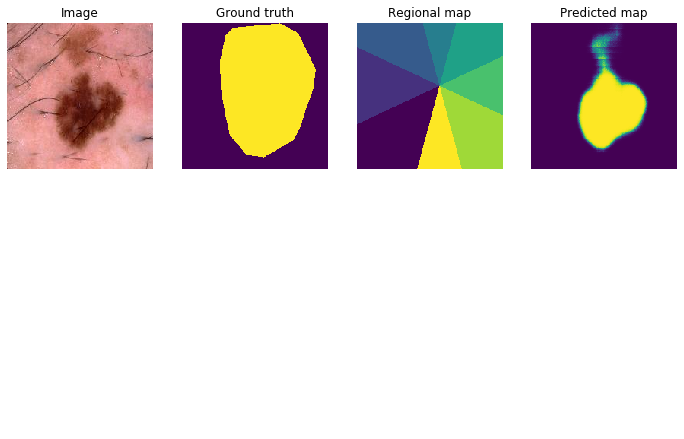

In [12]:
fig, axs = plt.subplots(2,4, figsize=(12,8))

axs[0][0].imshow(img)
axs[0][0].title.set_text("Image")
axs[0][1].imshow(gt)
axs[0][1].title.set_text("Ground truth")
axs[0][2].imshow(regional_map)
axs[0][2].title.set_text("Regional map")
axs[0][3].imshow(predicted)
axs[0][3].title.set_text("A sample predicted probabmap")
[ax.set_axis_off() for ax in axs.ravel()]

plt.show()